中文字体启用： SimHei


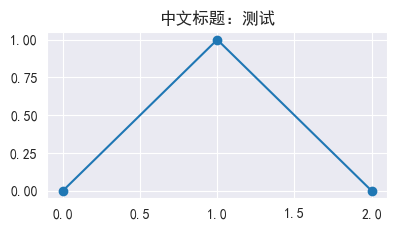

In [1]:
# ✓ Matplotlib 中文字体（无网络、不捕获异常）：仅在本机已有中文字体时启用
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

preferred = [
    "SimHei", "Microsoft YaHei", "PingFang SC", "Hiragino Sans GB",
    "Source Han Sans CN", "Source Han Sans SC", "Noto Sans CJK SC",
    "Noto Sans SC", "WenQuanYi Zen Hei", "Sarasa Gothic SC"
]
available = set(f.name for f in fm.fontManager.ttflist)
picked = ""
for name in preferred:
    if name in available:
        picked = name
        break

if picked:
    matplotlib.rcParams['font.sans-serif'] = [picked]
matplotlib.rcParams['axes.unicode_minus'] = False
print("中文字体启用：", picked if picked else "（未配置中文字体，使用默认）")

# 小测试
plt.figure(figsize=(4,2.4))
plt.title("中文标题：测试")
plt.plot([0,1,2],[0,1,0], "o-")
plt.tight_layout(); plt.show()

In [5]:
import nltk
nltk.data.path.append('/Users/neo/nltk_data')

from nltk.tokenize import word_tokenize, sent_tokenize
# 下载 punkt_tab
nltk.download('punkt_tab')

raw_text = """
Dr. Evelyn Reed, a leading economist at a major U.S. university,
stated: "The market's volatility is unprecedented. We haven't seen
this since the 2008 financial crisis." What are the implications?
"""

# 句子切分
sentences = sent_tokenize(raw_text)
print("--- Sentences ---")
for i, sentence in enumerate(sentences):
    print(f"{i+1}: {sentence.strip()}")

# 对第二句分词
print("\n--- Tokens for the second sentence ---")
tokens = word_tokenize(sentences[1])
print(tokens)

# 对所有句子分词（可选）
print("\n--- Tokens for all sentences ---")
all_tokens = [word_tokenize(sent) for sent in sentences]
print(all_tokens)


--- Sentences ---
1: Dr. Evelyn Reed, a leading economist at a major U.S. university,
stated: "The market's volatility is unprecedented.
2: We haven't seen
this since the 2008 financial crisis."
3: What are the implications?

--- Tokens for the second sentence ---
['We', 'have', "n't", 'seen', 'this', 'since', 'the', '2008', 'financial', 'crisis', '.', "''"]

--- Tokens for all sentences ---
[['Dr.', 'Evelyn', 'Reed', ',', 'a', 'leading', 'economist', 'at', 'a', 'major', 'U.S.', 'university', ',', 'stated', ':', '``', 'The', 'market', "'s", 'volatility', 'is', 'unprecedented', '.'], ['We', 'have', "n't", 'seen', 'this', 'since', 'the', '2008', 'financial', 'crisis', '.', "''"], ['What', 'are', 'the', 'implications', '?']]


In [4]:
# 继续使用 NLTK 进行预处理
import nltk
from nltk.corpus import stopwords
import string
import nltk
nltk.data.path.append('/Users/neo/nltk_data')  # 指定你之前的 nltk_data 路径

# 下载 stopwords
nltk.download('stopwords')

# 初次使用需要：nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 针对财务语境定制停用词
custom_stop_words = {'report', 'company', 'annual'}
stop_words.update(custom_stop_words)

review_text = "This company's annual report shows an excellent profit margin, but the overall strategy is unclear."

# 小写化并分词
tokens = nltk.word_tokenize(review_text.lower())
print(f"Original Tokens: {tokens}")

# 过滤停用词与标点
filtered_tokens = []
for token in tokens:
    if token.isalpha() and token not in stop_words:
        # isalpha() 顺带去除了标点
        filtered_tokens.append(token)

print(f"Filtered Tokens: {filtered_tokens}")

Original Tokens: ['this', 'company', "'s", 'annual', 'report', 'shows', 'an', 'excellent', 'profit', 'margin', ',', 'but', 'the', 'overall', 'strategy', 'is', 'unclear', '.']
Filtered Tokens: ['shows', 'excellent', 'profit', 'margin', 'overall', 'strategy', 'unclear']


In [6]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# 初次需要：nltk.download('wordnet')
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

words = ["automating", "automation", "automated", "automates", "better"]

print("--- Stemming ---")
for word in words:
    print(f"{word} -> {stemmer.stem(word)}")

print("\n--- Lemmatization (without Part of Speech) ---")
for word in words:
    print(f"{word} -> {lemmatizer.lemmatize(word)}")

print("\n--- Lemmatization (with Part of Speech) ---")
# 'better' 是形容词，pos='a'
print(f"better (adjective) -> {lemmatizer.lemmatize('better', pos='a')}")
# 'automates' 是动词，pos='v'
print(f"automates (verb) -> {lemmatizer.lemmatize('automates', pos='v')}")

--- Stemming ---
automating -> autom
automation -> autom
automated -> autom
automates -> autom
better -> better

--- Lemmatization (without Part of Speech) ---
automating -> automating
automation -> automation
automated -> automated
automates -> automates
better -> better

--- Lemmatization (with Part of Speech) ---
better (adjective) -> good
automates (verb) -> automate


In [7]:
import torch
import torch.nn as nn
import numpy as np

# 这是一个概念示例。实际项目需要解析大型 GloVe 文本文件（如 'glove.6B.100d.txt'）。
def load_glove_vectors():
    print("Simulating the loading of pre-trained GloVe vectors...")
    # 下面用极小词表与随机向量演示
    dummy_embeddings = {
        '<pad>': np.zeros(100),
        '<unk>': np.random.randn(100), # 未登录词向量
        'market': np.random.uniform(-1, 1, 100),
        'profit': np.random.uniform(-1, 1, 100),
        'loss': np.random.uniform(-1, 1, 100),
        'revenue': np.random.uniform(-1, 1, 100)
    }
    return dummy_embeddings

# 1. 构建任务词表（真实工程中来自训练数据）
vocab = {'<pad>': 0, '<unk>': 1, 'market': 2, 'profit': 3, 'loss': 4, 'revenue': 5}
vocab_size = len(vocab)
embedding_dim = 100 # 必须与预训练维度匹配
# 2. 加载预训练向量
pretrained_vectors = load_glove_vectors()

# 3. 为词表构建权重矩阵
weights_matrix = np.zeros((vocab_size, embedding_dim))
words_found = 0
for word, i in vocab.items():
    try:
        weights_matrix[i] = pretrained_vectors[word]
        words_found += 1
    except KeyError:
        # 未命中则随机初始化或保持为零
        weights_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

print(f"Found {words_found}/{vocab_size} words in pre-trained vectors.")

# 4. 创建 PyTorch 嵌入层并加载权重
weights_tensor = torch.FloatTensor(weights_matrix)
embedding_layer = nn.Embedding.from_pretrained(weights_tensor, freeze=True)
# freeze=True 表示微调时不更新该层权重，以保留大规模语料学到的通用知识

print(f"\nEmbedding layer created: {embedding_layer}")

# 5. 使用嵌入层
# 句子："market profit loss"
input_indices = torch.LongTensor([vocab['market'], vocab['profit'], vocab['loss']])
embedded_vectors = embedding_layer(input_indices)

print("\n--- Embedding Demo ---")
print(f"Input indices shape: {input_indices.shape}")
print(f"Output embedded vectors shape: {embedded_vectors.shape}")
print("The output is a 3x100 tensor, where each row is the 100-dim vector for a word.")

Simulating the loading of pre-trained GloVe vectors...
Found 6/6 words in pre-trained vectors.

Embedding layer created: Embedding(6, 100)

--- Embedding Demo ---
Input indices shape: torch.Size([3])
Output embedded vectors shape: torch.Size([3, 100])
The output is a 3x100 tensor, where each row is the 100-dim vector for a word.


In [8]:
import torch
import torch.nn as nn

# 单个 Transformer 编码层示例，包含多头注意力与前馈网络

# 参数
embed_dim = 512  # 词向量维度
num_heads = 8    # 注意力头数，需整除 embed_dim
ff_dim = 2048    # 前馈层维度
dropout = 0.1

# 创建编码层
transformer_layer = nn.TransformerEncoderLayer(
    d_model=embed_dim,
    nhead=num_heads,
    dim_feedforward=ff_dim,
    dropout=dropout,
    batch_first=True # 输入格式为 (batch, seq, features)
)

# 伪造输入
batch_size = 32
seq_length = 50
dummy_input = torch.rand(batch_size, seq_length, embed_dim)

print(f"Input shape: {dummy_input.shape}")

# 前向传播
output = transformer_layer(dummy_input)

print(f"Output shape: {output.shape}")
# 输出形状与输入相同，但向量已融入上下文信息

Input shape: torch.Size([32, 50, 512])
Output shape: torch.Size([32, 50, 512])


In [9]:
import torch
import os
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
#使用代理下载预训练模型，此处请修改为自己的代理IP地址和端口
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
# -------------------------------
# 1. 数据准备
# -------------------------------
data = {
    'text': [
        "The new software update is fantastic, very intuitive and fast!",
        "Completely useless product. It broke after just one use. Avoid.",
        "It's an okay service, nothing special but gets the job done.",
        "The customer support team was incredibly helpful and resolved my issue quickly.",
        "I am extremely disappointed with the quality. A total waste of money.",
        "Very satisfied with this purchase, it works exactly as advertised.",
        "The delivery was delayed by a week and the packaging was damaged.",
        "An excellent value for the price. The company has done a great job!",
        "The user interface is confusing and poorly designed.",
        "I will definitely be a returning customer, great experience overall."
    ],
    'label': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # 1 为正面，0 为负面
}

df = pd.DataFrame(data)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

# -------------------------------
# 2. 分词
# -------------------------------
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# -------------------------------
# 3. 自定义数据集
# -------------------------------
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
val_dataset = ReviewDataset(val_encodings, val_labels)

# -------------------------------
# 4. 加载模型并训练
# -------------------------------
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

# PyTorch AdamW
optimizer = AdamW(model.parameters(), lr=5e-5)

# 训练循环
print("\nStarting fine-tuning...")
model.train()
for epoch in range(3):
    print(f"\n--- Epoch {epoch+1} ---")
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        print(f"  Batch Loss: {loss.item():.4f}")

        loss.backward()
        optimizer.step()

# -------------------------------
# 5. 验证评估
# -------------------------------
print("\nStarting evaluation...")
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)

        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# -------------------------------
# 6. 新样本推理
# -------------------------------
print("\n--- Inference on New Reviews ---")
new_reviews = [
    "The financial report was impressive, showing strong growth.",
    "This is a disastrous investment, I regret putting money into it."
]
labels_map = {0: 'Negative', 1: 'Positive'}

inputs = tokenizer(new_reviews, padding=True, truncation=True, return_tensors="pt").to(device)

with torch.no_grad():
    logits = model(**inputs).logits

probabilities = F.softmax(logits, dim=1)
predicted_class_ids = torch.argmax(probabilities, dim=1).tolist()

for i, review in enumerate(new_reviews):
    pred_id = predicted_class_ids[i]
    confidence = probabilities[i][pred_id].item()
    print(f"\nReview: '{review}'")
    print(f"Predicted Sentiment: {labels_map[pred_id]} (Confidence: {confidence:.2f})")

Using device: cpu


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Starting fine-tuning...

--- Epoch 1 ---
  Batch Loss: 0.6535
  Batch Loss: 0.6833

--- Epoch 2 ---
  Batch Loss: 0.5120
  Batch Loss: 0.6300

--- Epoch 3 ---
  Batch Loss: 0.4895
  Batch Loss: 0.4601

Starting evaluation...

Validation Accuracy: 0.0000

--- Inference on New Reviews ---

Review: 'The financial report was impressive, showing strong growth.'
Predicted Sentiment: Positive (Confidence: 0.75)

Review: 'This is a disastrous investment, I regret putting money into it.'
Predicted Sentiment: Positive (Confidence: 0.73)


In [10]:
import os
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.optim import AdamW
from datasets import load_dataset
from sklearn.metrics import accuracy_score, f1_score
#使用代理下载预训练模型，此处请修改为自己的代理IP地址和端口
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
# 1. 加载数据集
dataset = load_dataset("financial_phrasebank", "sentences_50agree",trust_remote_code=True)
train_val_split = dataset['train'].train_test_split(test_size=0.2, seed=42)
train_dataset = train_val_split['train']
val_dataset = train_val_split['test']

print(f"训练样本: {len(train_dataset)}")
print(f"验证样本: {len(val_dataset)}")

# 打印一个样本
sample = train_dataset[0]
label_map = {0: '负面', 1: '中性', 2: '正面'}
print(f"样本句子: '{sample['sentence']}'")
print(f"标签: {label_map[sample['label']]}")

# 2. 分词
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples['sentence'], padding='max_length', truncation=True, max_length=128)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)

tokenized_train_dataset = tokenized_train_dataset.remove_columns(['sentence']).rename_column('label', 'labels')
tokenized_val_dataset = tokenized_val_dataset.remove_columns(['sentence']).rename_column('label', 'labels')
tokenized_train_dataset.set_format('torch')
tokenized_val_dataset.set_format('torch')

# 3. 数据加载器与模型
train_dataloader = DataLoader(tokenized_train_dataset, shuffle=True, batch_size=16)
val_dataloader = DataLoader(tokenized_val_dataset, batch_size=16)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# 4. 训练循环
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
    print(f"第{epoch+1}轮 平均训练损失: {total_train_loss/len(train_dataloader):.4f}")

    model.eval()
    all_preds, all_labels = [], []
    total_eval_loss = 0
    for batch in val_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
        total_eval_loss += outputs.loss.item()
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch["labels"].cpu().numpy())
    print(f"验证损失: {total_eval_loss/len(val_dataloader):.4f}")
    print(f"验证准确率: {accuracy_score(all_labels, all_preds):.4f}")
    print(f"验证F1加权分数: {f1_score(all_labels, all_preds, average='weighted'):.4f}")

# 5. 新句子推断
new_sentences = [
    "The company reported a record-breaking profit in the third quarter.",
    "Despite the economic downturn, the firm's revenue remained stable.",
    "The new regulations are expected to create significant losses for the industry."
]

model.eval()
with torch.no_grad():
    inputs = tokenizer(new_sentences, padding=True, truncation=True, return_tensors="pt").to(device)
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

for sentence, prediction in zip(new_sentences, predictions):
    print(f"\n句子: '{sentence}'")
    print(f"预测情绪: {label_map[prediction.item()]}")

训练样本: 3876
验证样本: 970
样本句子: 'Under the terms of the agreement , Bunge will acquire Raisio 's Keiju , Makuisa and Pyszny Duet brands and manufacturing plants in Finland and Poland .'
标签: 中性


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

第1轮 平均训练损失: 0.6064
验证损失: 0.4164
验证准确率: 0.8402
验证F1加权分数: 0.8377
第2轮 平均训练损失: 0.2412
验证损失: 0.4019
验证准确率: 0.8485
验证F1加权分数: 0.8475
第3轮 平均训练损失: 0.1018
验证损失: 0.4199
验证准确率: 0.8588
验证F1加权分数: 0.8588

句子: 'The company reported a record-breaking profit in the third quarter.'
预测情绪: 正面

句子: 'Despite the economic downturn, the firm's revenue remained stable.'
预测情绪: 正面

句子: 'The new regulations are expected to create significant losses for the industry.'
预测情绪: 负面


In [16]:
import os
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
#使用代理下载预训练模型，此处请修改为自己的代理IP地址和端口
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
model_name = "dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

text = """
Our international operations are subject to significant geopolitical risk,
particularly due to rising trade tensions with China. We are also exposed to
credit risk from our European counterparties.
"""

print("--- 提取风险相关实体 ---")
ner_results = ner_pipeline(text)

ner_pipeline_grouped = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")
ner_results_grouped = ner_pipeline_grouped(text)

print("\n处理后的实体识别结果:")
for entity in ner_results_grouped:
    print(f"  实体: '{entity['word']}', 类型: {entity['entity_group']}, 可信度: {entity['score']:.4f}")

# 实际应用中可定制标签，如'RISK_TYPE'等，针对特定领域实体进行微调

--- 提取风险相关实体 ---

处理后的实体识别结果:
  实体: 'China', 类型: LOC, 可信度: 0.9998
  实体: 'European', 类型: MISC, 可信度: 0.9997


In [17]:
# 使用sentence-transformers库，基于PyTorch，是句子及段落嵌入的标准工具
# 安装：pip install sentence-transformers
import os
from sentence_transformers import SentenceTransformer, util
import torch
#使用代理下载预训练模型，此处请修改为自己的代理IP地址和端口
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
model = SentenceTransformer('all-MiniLM-L6-v2')

compliance_manual = [
    "Employees must not trade securities while in possession of material non-public information.",
    "All new hires must complete the annual cybersecurity awareness training within 30 days.",
    "This section outlines the firm's policy on personal investments and conflicts of interest.",
    "Information is considered 'material' if a reasonable investor would consider it important in making an investment decision.",
    "Travel and expense reports must be submitted through the company portal for reimbursement."
]
query = "What is the policy on insider trading?"

print("--- 执行合规手册语义搜索 ---")

manual_embeddings = model.encode(compliance_manual, convert_to_tensor=True)
query_embedding = model.encode(query, convert_to_tensor=True)

print(f"\n手册嵌入维度: {manual_embeddings.shape}")
print(f"查询嵌入维度: {query_embedding.shape}")

cosine_scores = util.cos_sim(query_embedding, manual_embeddings)

scored_paragraphs = []
for i in range(len(compliance_manual)):
    scored_paragraphs.append({'text': compliance_manual[i], 'score': cosine_scores[0][i]})

scored_paragraphs = sorted(scored_paragraphs, key=lambda x: x['score'], reverse=True)

print("\n--- 查询最相关的前三条条款 ---")
for i, item in enumerate(scored_paragraphs[:3]):
    print(f"{i+1}. (得分: {item['score']:.4f}) '{item['text']}'")

--- 执行合规手册语义搜索 ---

手册嵌入维度: torch.Size([5, 384])
查询嵌入维度: torch.Size([384])

--- 查询最相关的前三条条款 ---
1. (得分: 0.4951) 'This section outlines the firm's policy on personal investments and conflicts of interest.'
2. (得分: 0.4339) 'Employees must not trade securities while in possession of material non-public information.'
3. (得分: 0.3125) 'Information is considered 'material' if a reasonable investor would consider it important in making an investment decision.'


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 根据PyTorch官方聊天机器人教程的概念结构
class EncoderRNN(nn.Module):
    """编码器，将输入序列转为上下文向量。"""
    def __init__(self, hidden_size, embedding, n_layers=1, dropout=0):
        super(EncoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size
        self.embedding = embedding
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers,
                          dropout=(0 if n_layers == 1 else dropout), bidirectional=True)

    def forward(self, input_seq, input_lengths, hidden=None):
        embedded = self.embedding(input_seq)
        packed = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)
        outputs, hidden = self.gru(packed, hidden)
        outputs, _ = nn.utils.rnn.pad_packed_sequence(outputs)
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, :, self.hidden_size:]
        return outputs, hidden

class AttnDecoderRNN(nn.Module):
    """解码器，生成机器人的回复序列。"""
    def __init__(self, embedding, hidden_size, output_size, n_layers=1, dropout=0.1):
        super(AttnDecoderRNN, self).__init__()
        self.embedding = embedding
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout = dropout

        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=(0 if n_layers == 1 else dropout))
        self.concat = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        
        self.attn = nn.Linear(hidden_size, hidden_size)
        self.attn_combine = nn.Linear(hidden_size * 2, hidden_size)

    def forward(self, input_step, last_hidden, encoder_outputs):
        embedded = self.embedding(input_step)
        embedded = F.relu(embedded)
        
        attn_weights = F.softmax(
            torch.bmm(embedded.unsqueeze(1), encoder_outputs.transpose(0, 1)), dim=2)
        context = torch.bmm(attn_weights, encoder_outputs.transpose(0, 1))
        
        rnn_input = torch.cat((embedded, context.squeeze(1)), 1)
        rnn_input = self.attn_combine(rnn_input).unsqueeze(0)
        
        output, hidden = self.gru(rnn_input, last_hidden)
        output = self.out(output.squeeze(0))
        output = F.softmax(output, dim=1)
        return output, hidden

# 训练时会输入(用户查询，机器人回复)对，用损失函数如 nn.NLLLoss 进行优化。

In [19]:
import os
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
#使用代理下载预训练模型，此处请修改为自己的代理IP地址和端口
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
documents = [
    "The battery life is excellent, lasts all day.",
    "My phone's battery drains way too quickly.",
    "I love the camera quality, the pictures are amazing.",
    "The screen is so bright and vibrant.",
    "The camera often fails to focus in low light.",
    "The display has a beautiful resolution.",
    "Wish the battery could be a bit better, but the camera is great.",
    "Phone gets hot after 10 minutes of video recording.",
    "Face ID unlocks the phone in less than a second.",
    "Call quality is crystal clear, even in noisy environments."
]

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

topics, probs = topic_model.fit_transform(documents)
print("\n--- 发现的主题 ---")
print(topic_model.get_topic_info())

print("\n--- 具体主题词（如主题0） ---")
print(topic_model.get_topic(0))

2025-11-27 21:30:03,228 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-27 21:30:03,270 - BERTopic - Embedding - Completed ✓
2025-11-27 21:30:03,270 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-27 21:30:07,590 - BERTopic - Dimensionality - Completed ✓
2025-11-27 21:30:07,592 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-27 21:30:07,605 - BERTopic - Cluster - Completed ✓
2025-11-27 21:30:07,614 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-11-27 21:30:07,628 - BERTopic - Representation - Completed ✓



--- 发现的主题 ---
   Topic  Count                 Name  \
0     -1     10  -1_the_is_in_camera   

                                      Representation  \
0  [the, is, in, camera, battery, phone, quality,...   

                                 Representative_Docs  
0  [The battery life is excellent, lasts all day....  

--- 具体主题词（如主题0） ---
False


In [20]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
# 示例使用通用模型，实际应针对员工评论标注数据微调
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 假设模型针对HR类别微调，实际此模型为通用情感分类
num_hr_labels = 4  # 0:薪酬, 1:工作生活平衡, 2:管理, 3:职业发展
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_hr_labels,ignore_mismatched_sizes=True)

label_map = {0: 'Compensation', 1: 'Work-Life Balance', 2: 'Management', 3: 'Career Growth'}

# Example employee feedback comments
employee_feedback = [
    "I feel my salary is not competitive with the market rate.",
    "The expectation to be available after hours is leading to burnout.",
    "My manager is not supportive and does not provide clear feedback.",
    "There are no clear paths for promotion within my department."
]

print("--- 员工反馈主题分类 ---")

# 以下为模拟预测，真实场景需训练模型和推断代码
simulated_predictions = [0, 1, 2, 3]

for i, text in enumerate(employee_feedback):
    prediction = simulated_predictions[i]
    print(f"\n反馈内容: '{text}'")
    print(f"  -> 预测主题: {label_map[prediction]}")

--- 员工反馈主题分类 ---

反馈内容: 'I feel my salary is not competitive with the market rate.'
  -> 预测主题: Compensation

反馈内容: 'The expectation to be available after hours is leading to burnout.'
  -> 预测主题: Work-Life Balance

反馈内容: 'My manager is not supportive and does not provide clear feedback.'
  -> 预测主题: Management

反馈内容: 'There are no clear paths for promotion within my department.'
  -> 预测主题: Career Growth


In [23]:
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
import pandas as pd
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
# 1. 模拟银行意图标注数据集
data = {
    'utterance': [
        "What is the balance in my savings account?",
        "Show me my current checking balance",
        "How much money do I have?",
        "I want to transfer $50 to my friend John",
        "Move 100 dollars from savings to checking",
        "Send money to my landlord",
        "I need to pay my credit card bill",
        "Can I schedule a payment for my electricity bill?",
        "Pay my visa bill",
        "My card is lost, please lock it immediately",
        "I think my debit card was stolen",
        "Freeze my credit card"
    ],
    'intent': [
        "check_balance", "check_balance", "check_balance",
        "transfer_funds", "transfer_funds", "transfer_funds",
        "pay_bill", "pay_bill", "pay_bill",
        "lock_card", "lock_card", "lock_card"
    ]
}
df = pd.DataFrame(data)

intent_map = {intent: i for i, intent in enumerate(df['intent'].unique())}
label_map = {i: intent for intent, i in intent_map.items()}
df['label'] = df['intent'].map(intent_map)

# 2. 创建PyTorch数据集和分词器
class BankingIntentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
train_dataset = BankingIntentDataset(df['utterance'].tolist(), df['label'].tolist(), tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# 3. 加载模型并准备微调
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=len(intent_map))
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

# 4. 微调循环
print("开始银行意图分类的简化微调...")
model.train()
for epoch in range(5):
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"第{epoch+1}轮，损失：{loss.item():.4f}")

# 5. 推断示范
def classify_intent(text):
    model.eval()
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=64,
        return_token_type_ids=False,
        padding='max_length',
        return_tensors='pt',
        truncation=True
    ).to(device)

    with torch.no_grad():
        outputs = model(encoding['input_ids'], attention_mask=encoding['attention_mask'])

    prediction = torch.argmax(outputs.logits, dim=1).item()
    return label_map[prediction]

print("\n测试意图分类模型：")
test_utterance = "How much is my visa bill?"
predicted_intent = classify_intent(test_utterance)
print(f"输入语句: '{test_utterance}'")
print(f"预测意图: '{predicted_intent}'")

开始银行意图分类的简化微调...
第1轮，损失：1.3808
第2轮，损失：1.3747
第3轮，损失：1.2838
第4轮，损失：1.2168
第5轮，损失：1.2235

测试意图分类模型：
输入语句: 'How much is my visa bill?'
预测意图: 'check_balance'


In [24]:
import os
from transformers import AutoTokenizer, AutoModelForTokenClassification
import torch
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
# 假设此模型已针对合同实体进行微调
model_name = "dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

custom_id2label = {
    0: "O", 1: "B-PARTY", 2: "I-PARTY", 3: "B-EFF_DATE", 4: "I-EFF_DATE",
    5: "B-TERM", 6: "I-TERM", 7: "B-ORG", 8: "I-ORG", 9: "B-LOC", 10: "I-LOC",
    11: "B-PER", 12: "I-PER", 13: "B-MISC", 14: "I-MISC"
}
model.config.id2label = custom_id2label

contract_text = "This agreement is made between Globex Corporation and Acme Inc on October 1, 2025."

from transformers import pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")
ner_results = ner_pipeline(contract_text)

print(f"--- 合同文本的自定义实体识别结果 ---")
print(f"文本: '{contract_text}'")
for entity in ner_results:
    print(f"  实体: '{entity['word']}', 类型: {entity['entity_group']}, 置信度: {entity['score']:.4f}")

print("\n--- 理想的自定义模型输出示范 ---")
print("  实体: 'Globex Corporation', 类型: 'PARTY'")
print("  实体: 'Acme Inc', 类型: 'PARTY'")
print("  实体: '2025年10月1日', 类型: 'EFF_DATE'")

--- 合同文本的自定义实体识别结果 ---
文本: 'This agreement is made between Globex Corporation and Acme Inc on October 1, 2025.'
  实体: 'Globex Corporation', 类型: TERM, 置信度: 0.9995
  实体: 'Acme Inc', 类型: TERM, 置信度: 0.9599

--- 理想的自定义模型输出示范 ---
  实体: 'Globex Corporation', 类型: 'PARTY'
  实体: 'Acme Inc', 类型: 'PARTY'
  实体: '2025年10月1日', 类型: 'EFF_DATE'


In [25]:
import os
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoModelForSequenceClassification
import torch
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
# 1. 属性词提取(ATE)模型，需用SemEval ABSA任务数据微调，此处模拟
ate_tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
ate_model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

review_text = "The fit of the jeans was perfect, but the shirt's color was too bright."
aspects =  ["fit", "color"]
print(f"--- 模拟属性提取 ---")
print(f"评论: '{review_text}'")
print(f"提取的属性: {aspects}")

# 2. 属性情感分类(ASC)模型，使用预训练情感分类器
asc_tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
asc_model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
sentiment_labels = {
    0: '1星（非常负面）', 1: '2星', 2: '3星（中性）', 3: '4星', 4: '5星（非常正面）'
}

print("\n--- 执行属性情感分类 ---")

clauses = {
    "fit": "The fit of the jeans was perfect",
    "color": "the shirt's color was too bright"
}

for aspect, text_clause in clauses.items():
    inputs = asc_tokenizer(text_clause, return_tensors="pt", truncation=True)
    with torch.no_grad():
        logits = asc_model(**inputs).logits
    predicted_class_id = torch.argmax(logits, dim=1).item()
    print(f"\n属性: '{aspect}'")
    print(f"  句子: '{text_clause}'")
    print(f"  预测情感: {sentiment_labels[predicted_class_id]}")

--- 模拟属性提取 ---
评论: 'The fit of the jeans was perfect, but the shirt's color was too bright.'
提取的属性: ['fit', 'color']

--- 执行属性情感分类 ---

属性: 'fit'
  句子: 'The fit of the jeans was perfect'
  预测情感: 5星（非常正面）

属性: 'color'
  句子: 'the shirt's color was too bright'
  预测情感: 2星


In [26]:
import os
import torch
import torch.nn as nn
from torch import device
from transformers import BertModel, BertTokenizer
import torchvision.models as models
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
class MultimodalSentimentClassifier(nn.Module):
    def __init__(self, num_labels=2, text_model_name='bert-base-uncased', freeze_encoders=True):
        super(MultimodalSentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(text_model_name)
        if freeze_encoders:
            for param in self.bert.parameters():
                param.requires_grad = False
        self.resnet = models.resnet18(pretrained=True)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Identity()
        if freeze_encoders:
            for param in self.resnet.parameters():
                param.requires_grad = False
        self.classifier = nn.Linear(self.bert.config.hidden_size + num_ftrs, num_labels)
        self.dropout = nn.Dropout(0.1)

    def forward(self, input_ids, attention_mask, image_tensor):
        text_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.pooler_output
        image_features = self.resnet(image_tensor)
        combined_features = torch.cat((text_features, image_features), dim=1)
        dropped_features = self.dropout(combined_features)
        logits = self.classifier(dropped_features)
        return logits

# 示例使用：
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = MultimodalSentimentClassifier().to(device)
text_input = tokenizer("This product is amazing!", return_tensors='pt').to(device)
image_input = torch.randn(1, 3, 224, 224).to(device)
logits = model(text_input['input_ids'], text_input['attention_mask'], image_input)
print(logits)

tensor([[ 0.2385, -0.0484]], grad_fn=<AddmmBackward0>)


Attention tensor shape: torch.Size([1, 12, 17, 17])


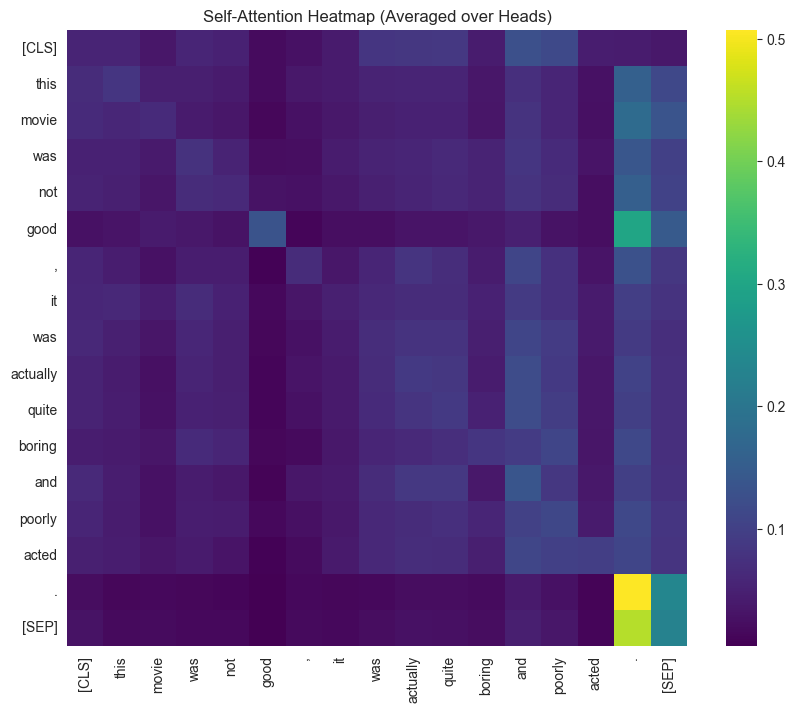

In [27]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7897'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7897'
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, output_attentions=True)

text = "This movie was not good, it was actually quite boring and poorly acted."
inputs = tokenizer(text, return_tensors='pt')

with torch.no_grad():
    outputs = model(**inputs)

last_layer_attentions = outputs.attentions[-1]
print(f"Attention tensor shape: {last_layer_attentions.shape}")

avg_attention_scores = last_layer_attentions.squeeze(0).mean(dim=0)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'].squeeze(0))

plt.figure(figsize=(10, 8))
sns.heatmap(avg_attention_scores.numpy(), xticklabels=tokens, yticklabels=tokens, cmap='viridis')
plt.title("Self-Attention Heatmap (Averaged over Heads)")
plt.show()

# 通过观察热图，可以看出模型关注了哪些词。
# 例如模型对“not”和“good”的联系赋予较高权重，准确捕捉了否定意义。